<a href="https://colab.research.google.com/github/Hadeersamirr/ML/blob/main/Predict_price_based_area_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy  as np
# sklearn standfor Science Kit Learn
from sklearn import linear_model
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [4]:
df.area.min()

2600

In [5]:
df.area.max()

4000

Equation:
y(price) = m (factor) * x(input area) + b(bais)

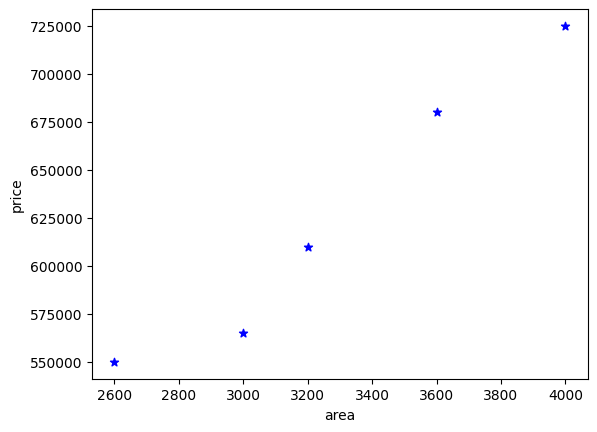

In [6]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price , color='blue' , marker ='*')
plt.show()

In [ ]:
y = mx + c ( m , c)

In [8]:
area = df.drop('price', axis='columns')
print(type(area))
area

<class 'pandas.core.frame.DataFrame'>


,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [9]:
price = df.price
print(type(price))
price

<class 'pandas.core.series.Series'>


0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [10]:
reg = linear_model.LinearRegression()
reg.fit(area,price) # fitting data (means training data )
#model.fit(x,y) x:all features , y: value to be predicted

LinearRegression()

**Predict price of a home with area = 3300 sqr ft**

In [11]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [12]:
reg.predict([[3200],[3300],[4200]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([615136.98630137, 628715.75342466, 750924.65753425])

In [13]:
reg.predict([[2600]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([533664.38356164])

In [14]:
reg.score(area,price)

0.9584301138199486

**y = mx + b**

In [15]:
reg.coef_ #(m) The coefficients are the weights assigned to each feature, indicating the strength and direction of the relationship.

array([135.78767123])

In [16]:
reg.intercept_ # (b) it is the point where the regression line intersects the y-axis.

180616.43835616432

**y = m * X + b (m is coefficient and b is intercept)**

In [17]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

In [18]:
reg.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

**Create CSV file with list of home price predictions**

In [20]:
area_df = pd.read_csv('areas.csv')
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [21]:
p =reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [22]:
type(p)

numpy.ndarray

In [24]:
area_df['prices'] = p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [25]:
area_df.to_csv("predication.csv" , index=False)

In [27]:
area_df.to_json('predication.json')

In [29]:
testdf= pd.read_csv('predication.csv')
testdf["prices"][0]

316404.1095890411